In [63]:
import pandas as pd#importing required libraies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [64]:
blog=pd.read_csv('/content/blogs.csv')#Reading the dataset
blog.head()#Showing the dataset

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


# Task 1. Data Exploration and Preprocessing



In [5]:
blog.info()#Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [7]:
blog.duplicated().sum()#Checking duplicate

0

In [32]:
import nltk#ownloading all available datasets and models from the NLTK library
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [38]:
import re#importing required libraries
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

In [39]:
def preprocess_text(text):#defining
    text = text.lower()# Converting text to lowercase
    text = re.sub(r'[^\w\s]', '', text) # Removing punctuation
    tokens = nltk.word_tokenize(text) # Tokenization

    stopwords_list = set(stopwords.words('english'))# Remove stopwords
    tokens = [word for word in tokens if word not in stopwords_list]

    text = ' '.join(tokens)# Joining tokens back into text
    return text


In [40]:
blog['Data']=blog['Data'].apply(preprocess_text)
blog['Labels']=blog['Labels'].apply(preprocess_text)
blog.head()

,Data,Labels
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism
1,newsgroups altatheism path cantaloupesrvcscmue...,alt.atheism
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism
4,xref cantaloupesrvcscmuedu altatheism53485 tal...,alt.atheism


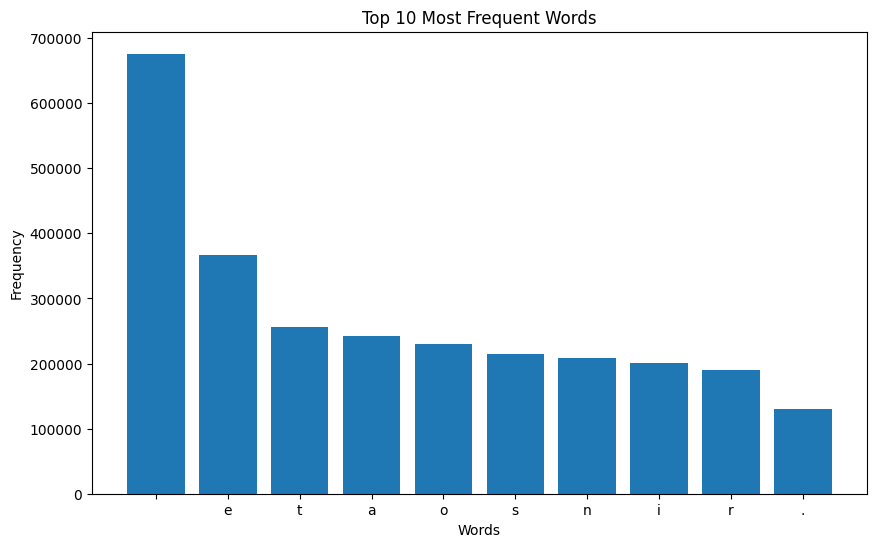

In [96]:
import matplotlib.pyplot as plt
from collections import Counter

# Flatten the list of tokens to count word frequencies
all_words = [word for tokens in blog['Data'] for word in tokens]
word_freq = Counter(all_words)

# Get the most common words
most_common_words = word_freq.most_common(10)
words, counts = zip(*most_common_words)

# Plot the word frequency
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

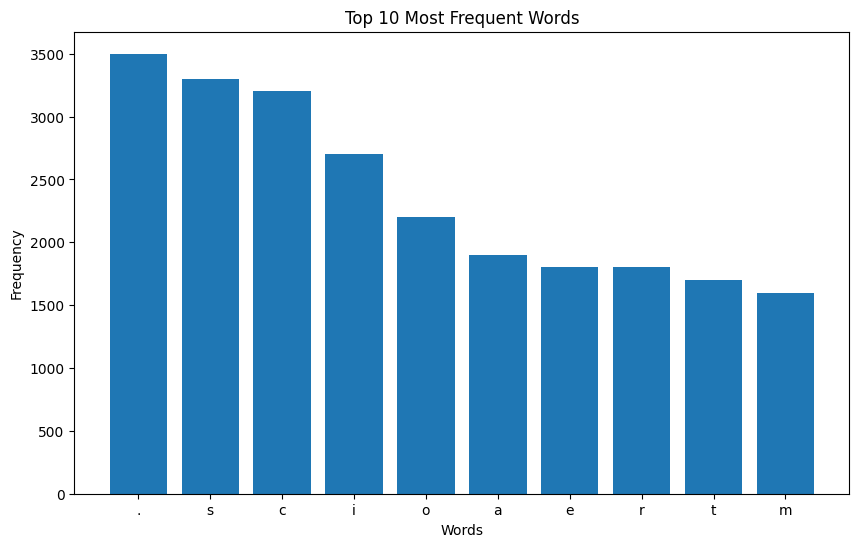

In [98]:
all_words = [word for tokens in blog['Labels'] for word in tokens]
word_freq = Counter(all_words)

# Get the most common words
most_common_words = word_freq.most_common(10)
words, counts = zip(*most_common_words)

# Plot the word frequency
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

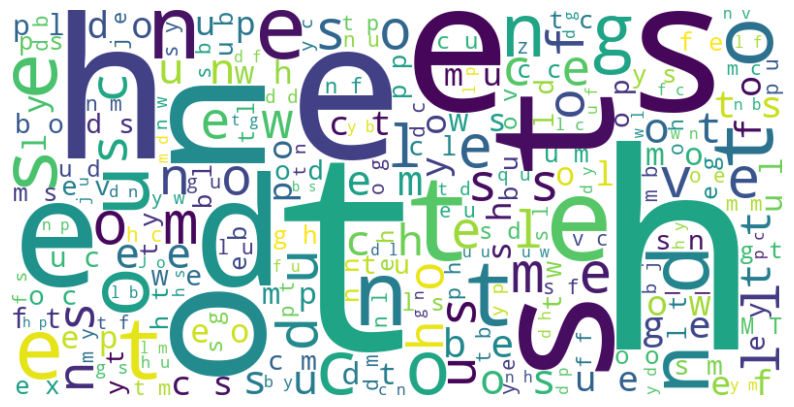

In [95]:
from wordcloud import WordCloud

# Join all tokens into one string
all_text = ' '.join([' '.join(tokens) for tokens in blog['Data']])

# Create and display a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

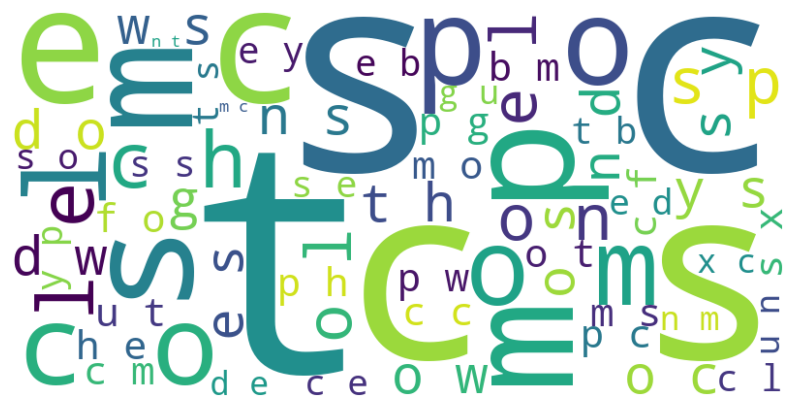

In [94]:
from wordcloud import WordCloud

# Join all tokens into one string
all_text = ' '.join([' '.join(tokens) for tokens in blog['Labels']])

# Create and display a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Task 2. Naive Bayes Model for Text Classification

In [65]:
x=blog['Data']#Features Extractions using TF-IDF
y=blog['Labels']

In [66]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(x)

In [67]:
x_train,x_test,y_train,y_test=train_test_split(X_tfidf,y,test_size=0.2,random_state=42)

In [68]:
nb_classifier = MultinomialNB()#Building Naive Bayes Model
nb_classifier.fit(x_train, y_train)

MultinomialNB()

In [69]:
y_pred=nb_classifier.predict(x_test)#prdicting

In [70]:
from sklearn.metrics import precision_score,recall_score,f1_score

accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
Recall=recall_score(y_test,y_pred,average='weighted')
F1_score=f1_score(y_test,y_pred,average='weighted')
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",Recall)
print("F1_score:",F1_score)


Accuracy: 0.7725
Precision: 0.7979831585418325
Recall: 0.7725
F1_score: 0.7646881102544693


In [71]:
classification_rep=classification_report(y_test,y_pred)
print("Classification Report:\n",classification_rep)

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.60      0.83      0.70        18
           comp.graphics       0.74      0.78      0.76        18
 comp.os.ms-windows.misc       0.84      0.95      0.89        22
comp.sys.ibm.pc.hardware       0.72      0.84      0.78        25
   comp.sys.mac.hardware       0.79      0.52      0.63        21
          comp.windows.x       0.92      0.44      0.59        25
            misc.forsale       0.93      0.72      0.81        18
               rec.autos       0.71      0.94      0.81        18
         rec.motorcycles       0.92      0.75      0.83        16
      rec.sport.baseball       0.88      0.83      0.86        18
        rec.sport.hockey       0.60      1.00      0.75        15
               sci.crypt       0.73      1.00      0.84        19
         sci.electronics       0.69      0.56      0.62        16
                 sci.med       0.84      0.94      

Interpretation:

**Accuracy:** The proportion of correctly classified instances out of the total instances. It provides a general measure of how well the model is performing.

**Precision:** The ratio of true positive predictions to the total predicted positives. It indicates how many of the predicted positive instances were actually positive.

**Recall:** The ratio of true positive predictions to the total actual positives. It measures how many of the actual positive instances were correctly predicted.

**F1 Score:** The harmonic mean of precision and recall. It provides a balance between precision and recall, especially useful when dealing with imbalanced classes.

In [72]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [73]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Sentiment Analysis
nltk.download('vader_lexicon')  # Download VADER lexicon
sid = SentimentIntensityAnalyzer()
sentiments = []
for post in blog['Data']:
    sentiment_score = sid.polarity_scores(post)
    if sentiment_score['compound'] >= 0.05:
        sentiment = 'positive'
    elif sentiment_score['compound'] <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    sentiments.append(sentiment)

blog['Sentiment'] = sentiments

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [74]:
# Evaluate sentiment distribution across different categories
sentiment_category_distribution = blog.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0)
print("\nSentiment Distribution Across Categories:")
print(sentiment_category_distribution)


Sentiment Distribution Across Categories:
Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                     42        1        57
comp.graphics                   13        4        83
comp.os.ms-windows.misc         24        2        74
comp.sys.ibm.pc.hardware        21        0        79
comp.sys.mac.hardware           24        3        73
comp.windows.x                  20        2        78
misc.forsale                     7        8        85
rec.autos                       27        1        72
rec.motorcycles                 30        2        68
rec.sport.baseball              27        1        72
rec.sport.hockey                28        1        71
sci.crypt                       29        0        71
sci.electronics                 18        4        78
sci.med                         38        1        61
sci.space                       32        3        65
soc.religion.christian          29     

**Sentiment Distribution:**

Positive Sentiment: Percentage of blog posts categorized as having positive sentiment.

Negative Sentiment: Percentage of blog posts categorized as having negative sentiment.

Neutral Sentiment: Percentage of blog posts categorized as having neutral sentiment.


In [75]:
print("Overall Sentiment Distribution:")
overall_sentiment_distribution = blog['Sentiment'].value_counts()
print(overall_sentiment_distribution)

Overall Sentiment Distribution:
Sentiment
positive    1334
negative     631
neutral       35
Name: count, dtype: int64


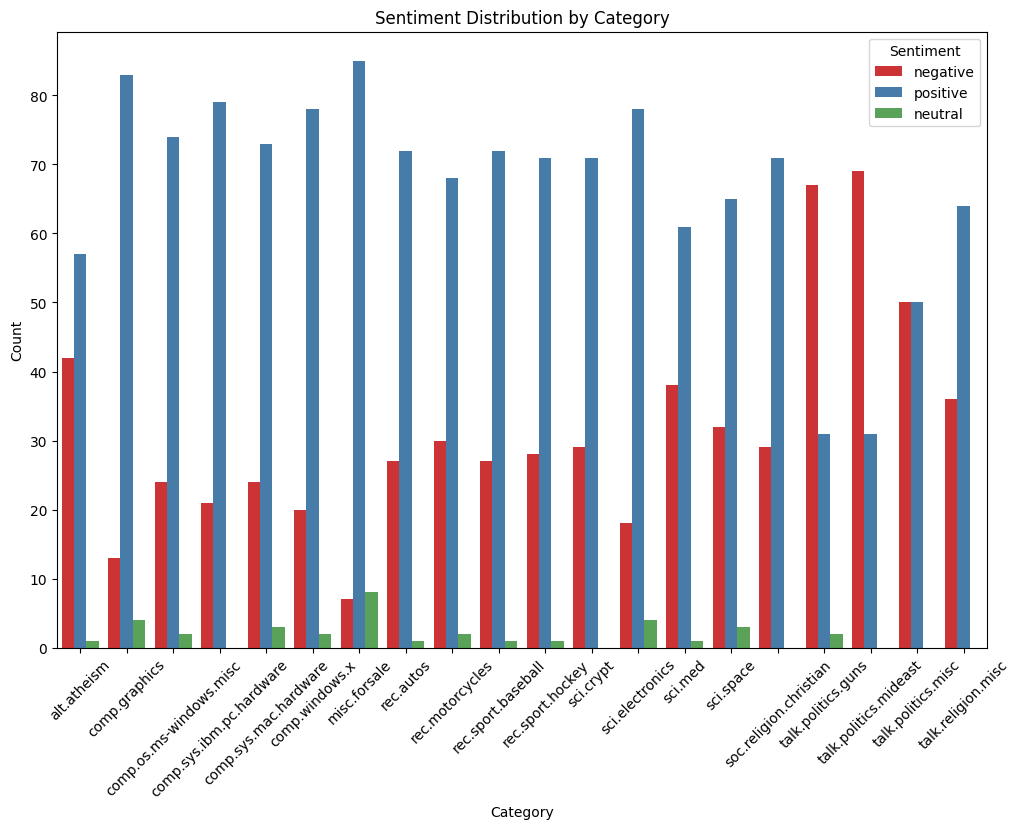

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.countplot(data=blog, x='Labels', hue='Sentiment', palette='Set1')
plt.title('Sentiment Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

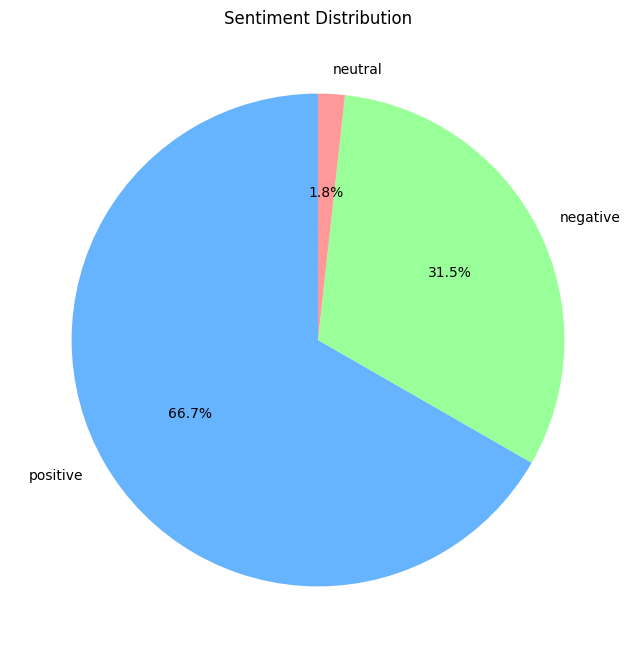

In [85]:
sentiment_counts = blog['Sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ff9999'])
plt.title('Sentiment Distribution')
plt.show()

# Challenges:

**a. Data Imbalance:**

**Issue:** If some categories are significantly underrepresented in the dataset, the model might be biased towards the majority classes.

**Solution:**Techniques like oversampling, undersampling, or using different evaluation metrics (e.g., F1 score) can help address this issue.

**b. Feature Selection:**

**Issue:** Including too many features or irrelevant features can affect model performance. On the other hand, missing important features might reduce the model's accuracy.

**Solution:** Use techniques such as feature selection or dimensionality reduction to identify the most relevant features.

**c. Overfitting or Underfitting:**

**Issue:** Overfitting occurs when the model performs well on training data but poorly on test data. Underfitting happens when the model is too simple to capture the underlying patterns.

**Solution:** Regularization techniques or adjusting hyperparameters can help balance model complexity.

**d. Preprocessing Challenges:**

**Issue:** Inconsistent text preprocessing (e.g., incorrect removal of stopwords or punctuation) can affect the model's ability to learn meaningful patterns.

**Solution:** Ensure consistent and thorough text preprocessing steps.

**e. Sentiment Analysis Integration:**

**Issue:** Integrating sentiment analysis with text classification can be challenging, especially if sentiment polarity affects category prediction.

**Solution:** Use sentiment features as additional inputs to the classification model if sentiment is relevant to the categorization.